# This script demonstrates the least square approximate solution
# Name : Sunjun Hwang
# Student ID : 20151766
# github link : https://github.com/tjswns494/Mathematical-Foundations-for-Computer-Vision-and-Machine-Learning-assignment.git

# import packages for plotting graph and manipulating data:

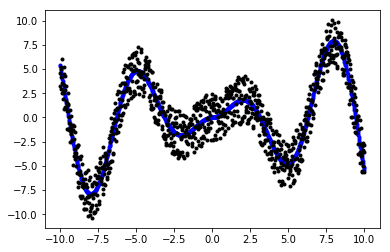

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (clean) y-coordinate data 
# y2 : (noisy) y-coordinate data

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x) 			# clean points
y2      = y1 + nn * std		# noisy points

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

# setup matircs

In [3]:
xp=np.zeros((16,1001))
xp[0]=x
for i in range(len(xp)-1):
    xp[i+1]=xp[i]*x
ones=np.ones(num)
b=y2


# define polynomial x

In [4]:
def a_stack(num):
    a=xp[0]
    for i in range(num):
        a=np.column_stack((a,xp[i+1]))
    return a

# Plot the polynomial curves that fit the noisy data by the least square error with varying p

p is 6


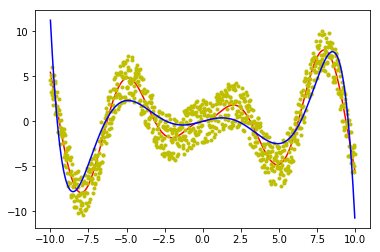

p is 7


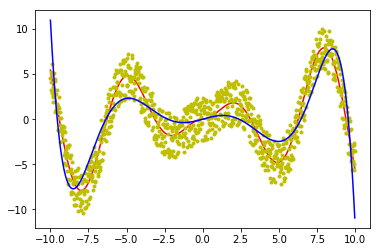

p is 8


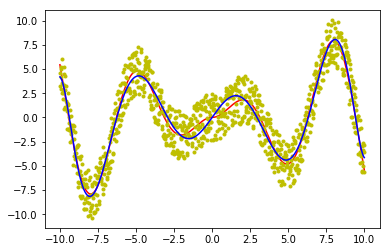

p is 9


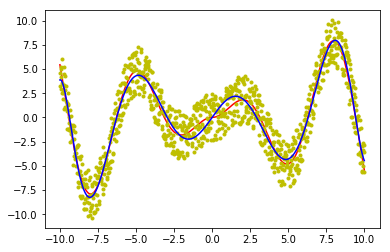

p is 10


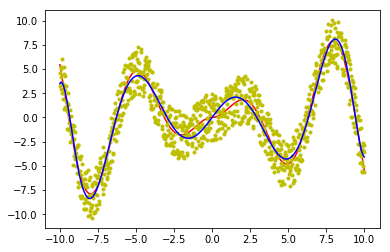

p is 11


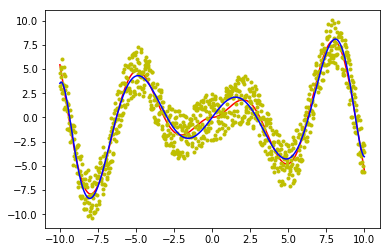

p is 12


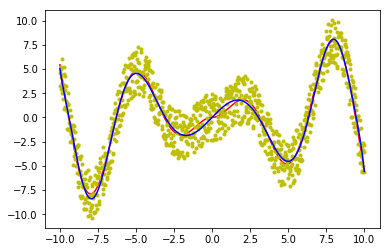

p is 13


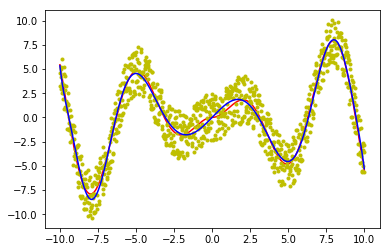

p is 14


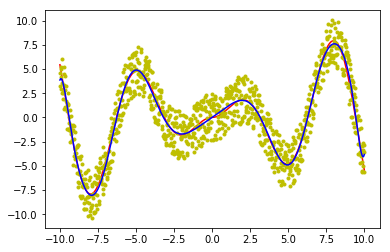

p is 15


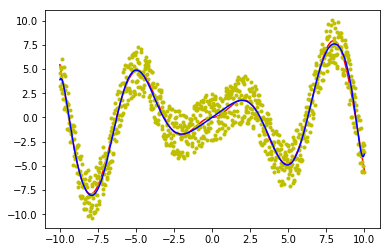

In [5]:
p=[6,7,8,9,10,11,12,13,14,15]
lamda=[pow(2,-3),pow(2,-2),pow(2,-1),pow(2,0),pow(2,1),pow(2,2),pow(2,3)]
for i in range(len(p)):
    a1=a_stack(p[i])
    q=np.zeros(p[i]+1)
    B=np.matrix(np.concatenate((b,q),axis=0)).T
    A=np.concatenate((a1,lamda[0]**0.5*np.eye(len(a1[0]))),axis=0)
    lsp=np.linalg.inv(A.T.dot(A)).dot(A.T).dot(B)
    y=0
    print("p is "+str(p[i]))
    for i in range(len(a1[0])):
        y+=lsp[i]*xp[i]
    plt.plot(x, y1, 'r',x,y2,'y.',x,y.T,'b')
    plt.show()


# Plot the polynomial curves that fit the noisy data by the least square error with varying lamda

lamda is 0.125


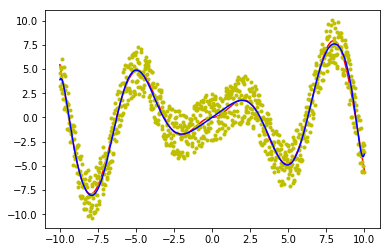

lamda is 0.25


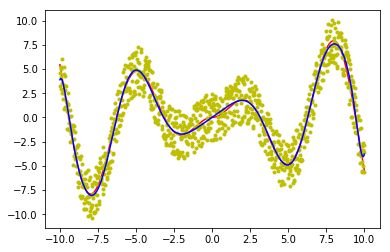

lamda is 0.5


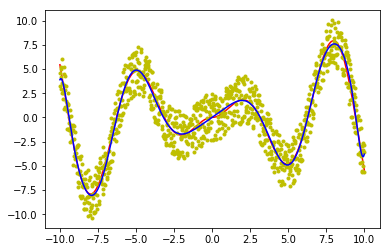

lamda is 1


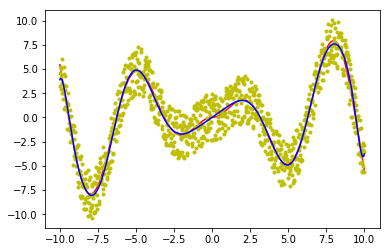

lamda is 2


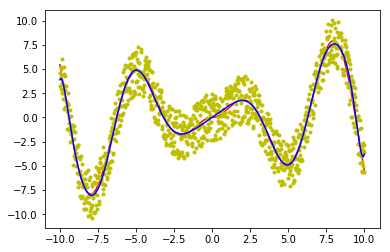

lamda is 4


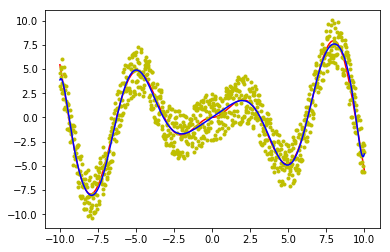

lamda is 8


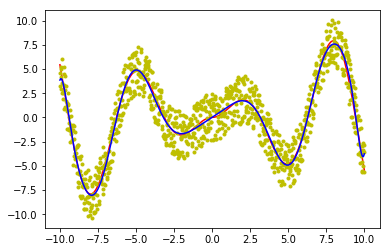

In [6]:
energy=np.zeros(len(lamda))
for i in range(len(lamda)):
    a1=a_stack(p[9])
    q=np.zeros(p[9]+1)
    B=np.matrix(np.concatenate((b,q),axis=0)).T
    A=np.concatenate((a1,lamda[i]**0.5*np.eye(len(a1[0]))),axis=0)
    lsp=np.linalg.inv(A.T.dot(A)).dot(A.T).dot(B)
    y=0
    print("lamda is "+str(lamda[i]))
    energy[i]=(A.dot(lsp)-B).T.dot(A.dot(lsp)-B)
    for i in range(len(a1[0])):
        y+=lsp[i]*xp[i]
    plt.plot(x, y1, 'r',x,y2,'y.',x,y.T,'b')
    plt.show()


# plot the energy with varying lamda

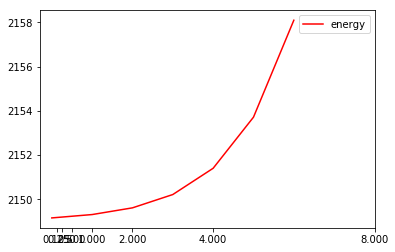

In [7]:
plt.figure()
plt.plot(energy,color='r',label='energy')
plt.xticks(lamda)
plt.legend()
plt.show()